In [1]:
import drawsvg as dw
%load_ext jhmagics

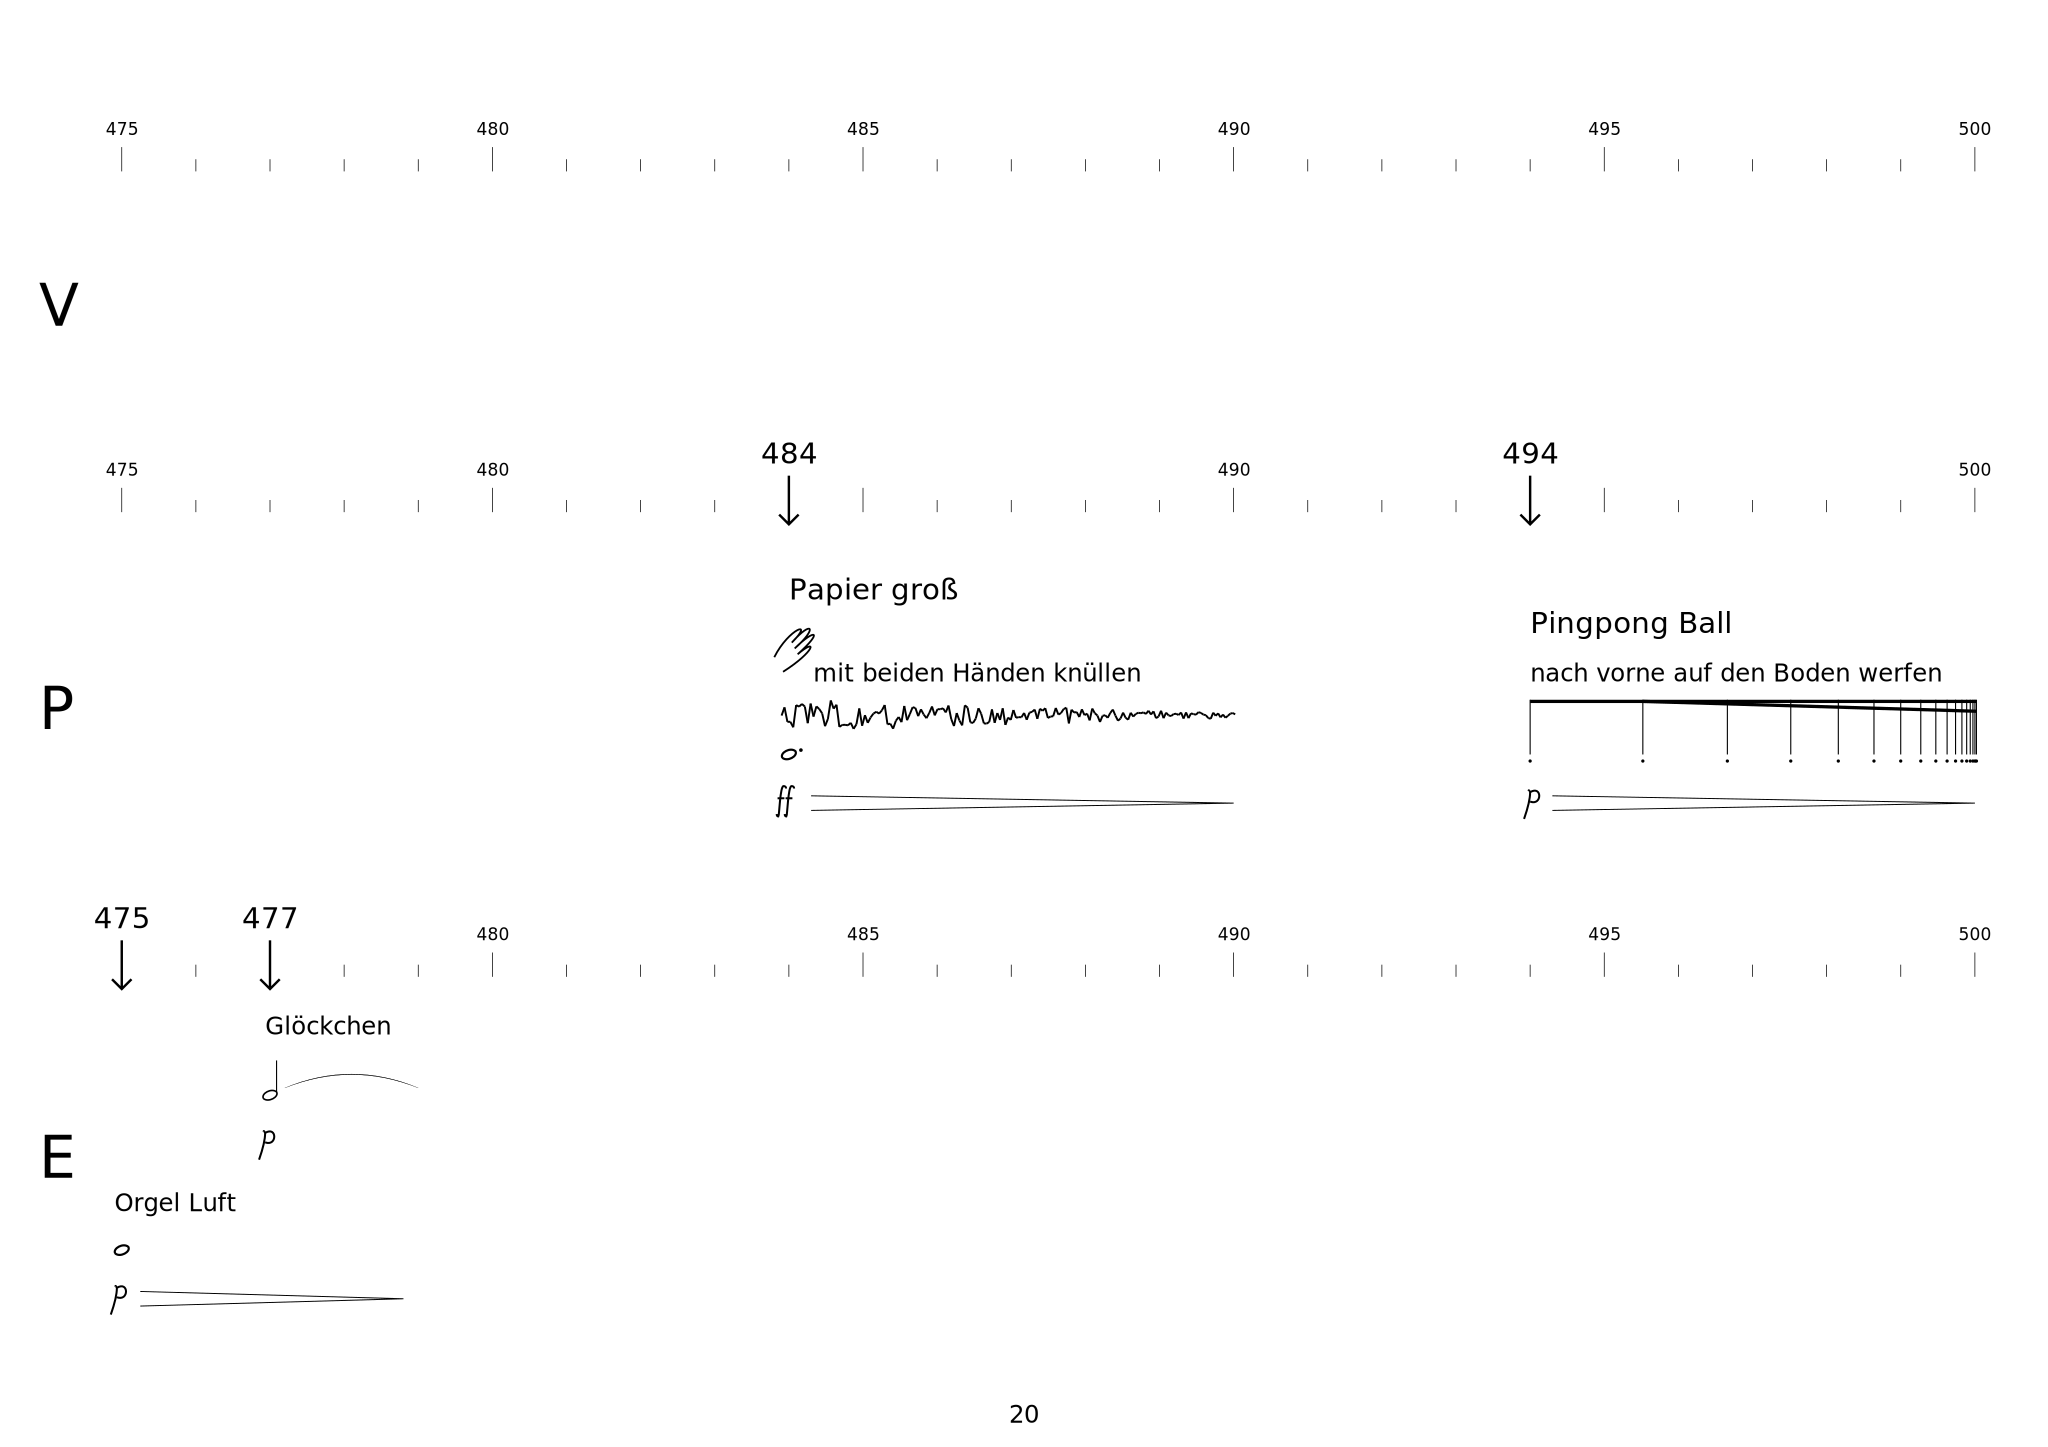

In [76]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# seitenzahl
seite = 20
d.append(dw.Text('%d'%seite,10,w/2,h-10,text_anchor='middle'))

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten und instrumente links
tm0 = 475  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[475,480,485,490,495,500],[475,480,490,500],[480,485,490,495,500]]
 # events in V P E
event = [[],[484,494],[475,477]]
 # ygrid positionen für die leisten
yleisten = [1,6.5,14]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-34,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.3)
        else: vline(x,y+off,-5,sw=.3)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,7,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################



################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
yloffsets = [6,4] #abstände der linien von der perc zeitleiste
yltemp,ylalu = [i+ypercindx for i in yloffsets]
ypercinstrs = [yltemp,ylalu]
startends = [444,445,446,449]
insnamen = [['Tempel-','block'],'Alufolie']
yoffsetins = [2.9,2.4] #abstand der namen von den linien
for i,yl in enumerate(ypercinstrs):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    #line(x1,y,x2,y,stroke_width=0.5)
    #text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')    

 # papier
x = xg(484)
y = yg(11) #quasi linie
from random import seed
seed(13)
yy = y-40
text('Papier groß',x,yg(8.5),12,font_family='Cantarell')
yy = y-40
hand(x,yy)
yy = y-30
text('mit beiden Händen knüllen',x+10,yy,10,font_family='Cantarell Light')
yy = y-16
kratzgliss_seg([x-3,yy,xg(490),yy],[7,1],[1.2,1],.8)
not1tel(x,y,notsiz,dotted=1)
yy = y+20
fortissimo(x-3,yy+3,dynsiz)
dim(xg(484.3),yy,xg(490),yy,6)

 # ball
x = xg(494)
y = yg(11) #quasi linie
yy = y-50
text('Pingpong Ball',x,yy,12,font_family='Cantarell')
yy = y-30
text('nach vorne auf den Boden werfen',x,yy,10,font_family='Cantarell Light')
xlis = x_accelrit(x,xg(500),numnotes=17,ratio=3/4)
accel_stacc(xlis,y,ybotadd=0,dirlen=2,y_space=notsiz,swfac=1,swbalkfac=1,
                c='#444',dotsizfac=1,startbalkindx=1,endbalkindx=-1)
yy = y+20
piano(x,yy,dynsiz)
dim(xg(494.3),yy,xg(500),yy,6)

################# ELEKTRONIK #################

# orgel luft
x = xg(475)
y = yg(19)
yy = y-16
text('Orgel Luft',x-3,yy,10,font_family='Cantarell Light')
not1tel(x,y,notsiz)
yy = y+20
piano(x-2,yy,dynsiz)
dim(xg(475.25),yy,xg(478.8),yy,6)

# glöckchen
x = xg(477)
y = yg(16.5)
yy = y-25
text('Glöckchen',x-2,yy,10,font_family='Cantarell Light')
not2tel(x,y,nothals,notsiz)
yy = y-3
tie(xg(477.2),yy,xg(479),yy,-1,.1,thick=.2)
yy = y+20
piano(x-2,yy,dynsiz)

d.set_pixel_scale(4)
d.save_png('partitur_%02d.png'%seite)
d.save_svg('partitur_%02d.svg'%seite)
d

In [57]:
help(kratzgliss_seg)

Help on function kratzgliss_seg in module __main__:

kratzgliss_seg(xyseg=[10, 20, 50, 20, 100, 30, 150, 10], hseg=[3, 1, 8, 1], pseg=[1, 2, 3, 2], sw=1, c='black', **args)
    kratzglissando mit segmenten zwischen denen interpoliert wird
    xyseg: mindestens zwei segmente aus xy paaren
    hseg: genauso viele segmente für die höhe, oder konstanter wert
    pseg: genauso viele segmente für die periode, oder konstanter wert
    sw: ein wert für strke width, oder liste mit werten für die segmente

